In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import  FeatureUnion
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train= pd.read_csv('.//datasets//''train.csv')
test= pd.read_csv('.//datasets//''test.csv')

In [4]:
train.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 350.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0830F250>,
      dtype=object)

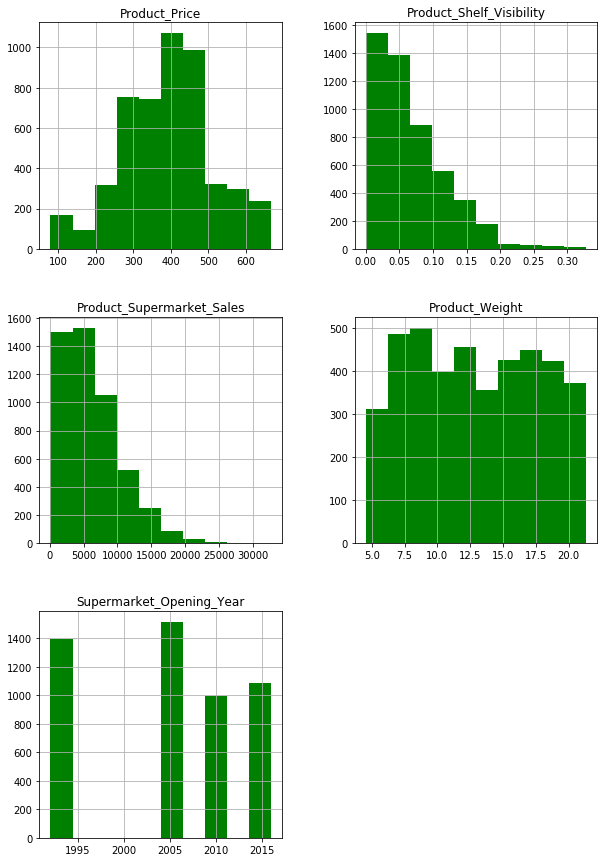

In [6]:
train.hist(figsize=(10,15), color='g' )

In [7]:
train_corr= train.corr()

In [8]:
train_corr['Product_Supermarket_Sales'].sort_values(ascending=False)

Product_Supermarket_Sales    1.000000
Product_Price                0.518285
Supermarket_Opening_Year     0.051297
Product_Weight               0.015322
Product_Shelf_Visibility    -0.164943
Name: Product_Supermarket_Sales, dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 350.9+ KB


In [10]:
train.drop(['Product_Identifier', 'Supermarket_Identifier','Product_Supermarket_Identifier'], axis=1, 
           inplace=True)

In [13]:
train.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility',
       'Product_Type', 'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [14]:
train_labels= train['Product_Supermarket_Sales'].copy()
train= train.drop('Product_Supermarket_Sales', axis=1)

In [15]:
x_train, x_test, y_train, y_test= train_test_split(train, train_labels, test_size= 0.3, random_state= 42)

In [36]:
train= x_train.copy()

In [37]:
train.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility',
       'Product_Type', 'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type'],
      dtype='object')

In [38]:
lb=LabelEncoder()

In [39]:
imputer= Imputer(strategy='median')

In [40]:
std= StandardScaler()

In [41]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [31]:
num_attr= list(train_num)
cat_attr= list(train_cat)

In [44]:
train_pipeline= Pipeline([
    ('lbl', LabelEncoder()),
    ('imputer', Imputer(strategy='median')),
    ('std', StandardScaler()),
])

In [45]:
train_pipeline.fit_transform(train)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [33]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('lbl', LabelEncoder()),
])

In [34]:
full_pipeline= FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])